In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

$z = w_0x_0 + w_1x_1 + w_2x_2 + ...+ w_nx_n$

**In vector notation:**

$z=w^TX$ meaning that there are two vectors of numbers and we’ll multiply each element and add them up to get one number. The vector $X$ is our input data, and we want to find the best coefficients $w$, so that this classifier will be as successful as possible. 

In [2]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

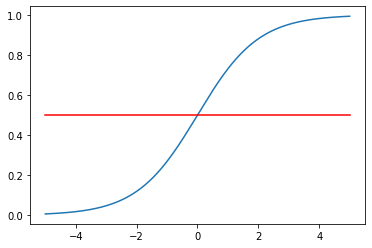

In [3]:
z = np.linspace(-5,5,1000)
plt.plot(z, sigmoid(z))
x_coordinates = [-5, 5]
y_coordinates = [0.5, 0.5]

plt.plot(x_coordinates, y_coordinates, "r");

In [71]:
## convert text file into matrix
def file2matrix(filename , header = True, delimeter="\t", index_y = None):
    """
    Takes a .txt file and returns a list of column names,a matrix of features and
    a vectore of y in case of having a target variable.
    """    
    fr = open(filename)
    colName = []
    if header == True:
        colName = list(fr.readline().strip().split(delimeter))
    numberOfLines = len(fr.readlines())
    fr = open(filename)
    numberOfX = len(fr.readline().split(delimeter)) 
    if index_y is not None:
        numberOfX = len(fr.readline().split(delimeter))-1                   
    returnMatX = np.zeros((numberOfLines,numberOfX))
    classLabelVector = []
    fr = open(filename)
    firstRow = 0
    if header == True:
        firstRow = 1
    index = 0
    for line in fr.readlines()[firstRow:]:
        line = line.strip()                            
        listFromLine = line.split(delimeter)
        if index_y is not None:
            classLabelVector.append(listFromLine[index_y])
            listFromLine.pop(index_y)
        fltListFromLine = list(map(lambda x: float(x) if x!="" else np.nan, listFromLine))                                 
        returnMatX[index,:] = fltListFromLine        
        index += 1
    return colName, returnMatX, classLabelVector

In [72]:
filename = "testSet.txt"
colName, returnMatX, classLabelVector = file2matrix(filename, header = True, index_y = -1)
y = [int(x) for x in classLabelVector]
X = returnMatX

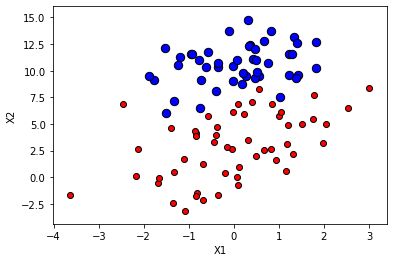

In [4]:
for x1, x2, target in zip(X[:,0], X[:,1], np.array(y)):
    if target == 0:
        plt.scatter(x1, x2, s = 70, color = "blue", edgecolors="k")
    else:
        plt.scatter(x1, x2, color = "red", edgecolors="k") 

plt.xlabel("X1")
plt.ylabel("X2");

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def gradAscent(X, classLabels):
    dataMatrix = np.mat(X)
    labelMat = np.mat(classLabels).T
    m, n = dataMatrix.shape
    alpha = 0.001
    maxCycles = 1000
    weights = np.ones((n,1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights) ## equal to np.dot(dataMatrix,weights)
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.transpose()* error
    return weights

weights :  [[ 5.43298517]
 [ 0.58542644]
 [-0.78255902]]


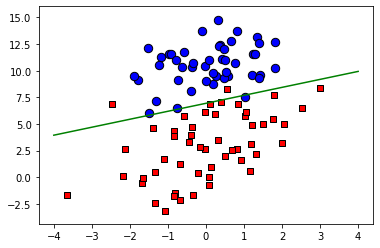

In [258]:
## plotting the decision boundary
for x1, x2, target in zip(X[:,0], X[:,1], np.array(y)):
    if target == 0:
        plt.scatter(x1, x2, s = 70, color = "blue", edgecolors="k")
    else:
        plt.scatter(x1, x2, color = "red", edgecolors="k", marker='s')

        
a = np.ones((X.shape[0],1)) ## for giving intercept
XX = np.hstack((a,X))
weights = gradAscent(XX, y)
print("weights : ", weights)
x = np.linspace(-4, 4, 100)
yy = -(weights[0,0]+weights[1,0]* x)/weights[2,0] 
plt.plot(x, yy, color = "g");

In [8]:
## Stochastic gradient ascent
def stocGradAscent0(X, classLabels):
    m, n = X.shape
    alpha = 0.01
    weights = np.ones(n)
    for i in range(m):
        h = sigmoid(sum(X[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * X[i]
    return weights

weights :  [ 1.01050844  0.86162698 -0.36536115]


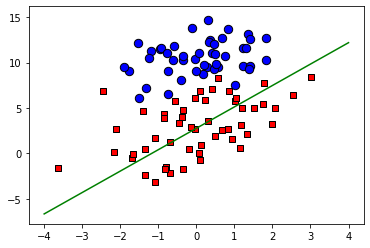

In [9]:
## plotting the decision boundary
for x1, x2, target in zip(X[:,0], X[:,1], np.array(y)):
    if target == 0:
        plt.scatter(x1, x2, s = 70, color = "blue", edgecolors="k")
    else:
        plt.scatter(x1, x2, color = "red", edgecolors="k", marker='s')

        
a = np.ones((X.shape[0],1)) ## for giving intercept
XX = np.hstack((a,X))
weights = stocGradAscent0(XX, y)
print("weights : ", weights)
x = np.linspace(-4, 4, 100)
yy = -(weights[0]+weights[1]* x)/weights[2] 
plt.plot(x, yy, color = "g");

### gradient ascent

In [10]:
a = np.ones((X.shape[0],1)) ## for giving intercept
XX = np.hstack((a,X))
dataMatrix = np.mat(XX)
labelMat = np.mat(y).T
m, n = dataMatrix.shape
alpha = 0.01
maxCycles = 20000
weights = np.ones((n,1))
weight0, weight1, weight2 = [], [], []
for k in range(maxCycles):
    h = sigmoid(dataMatrix*weights) ## equal to np.dot(dataMatrix,weights)
    error = (labelMat - h)
    weights = weights + alpha * dataMatrix.transpose()* error
    weight0.append(weights[0,0])
    weight1.append(weights[1,0])
    weight2.append(weights[2,0])

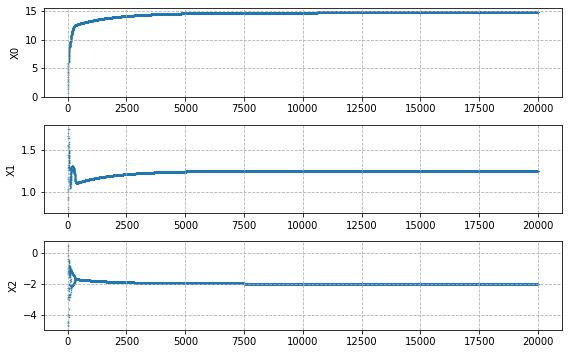

In [262]:
## Weights versus iteration number for one pass through the dataset, with this method.
plt.figure(figsize=(8,5))
plt.subplot(3,1, 1)
plt.scatter(range(1,maxCycles+1),weight0, marker=".", s = 1)
plt.ylabel("X0")
plt.grid(linestyle="--")
plt.subplot(3,1, 2)
plt.scatter(range(1,maxCycles+1),weight1, marker=".", s = 1 )
plt.ylabel("X1")
plt.grid(linestyle="--")
plt.subplot(3,1, 3)
plt.scatter(range(1,maxCycles+1),weight2, marker=".", s = 1 )
plt.ylabel("X2")
plt.grid(linestyle="--")
plt.tight_layout()

### Stochastic gradient ascent

In [11]:
a = np.ones((X.shape[0],1)) ## for giving intercept
XX = np.hstack((a,X))
m, n = XX.shape
alpha = 0.01
weight0, weight1, weight2 = [], [], []
weights = np.ones(n)
for iteration in range(1, 5000):
    for i in range(m):
        h = sigmoid(sum(XX[i]*weights))
        error = y[i] - h
        weights = weights + alpha * error * XX[i]
    weight0.append(weights[0])
    weight1.append(weights[1])
    weight2.append(weights[2])

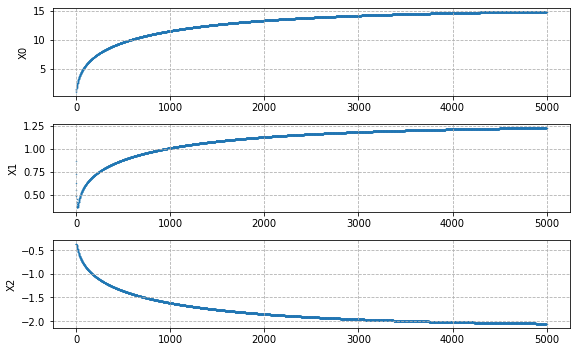

In [12]:
plt.figure(figsize=(8,5))
plt.subplot(3,1, 1)
plt.scatter(range(1,iteration+1),weight0, marker=".", s = 1)
plt.ylabel("X0")
plt.grid(linestyle="--")
plt.subplot(3,1, 2)
plt.scatter(range(1,iteration+1),weight1, marker=".", s = 1 )
plt.ylabel("X1")
plt.grid(linestyle="--")
plt.subplot(3,1, 3)
plt.scatter(range(1,iteration+1),weight2, marker=".", s = 1 )
plt.ylabel("X2")
plt.grid(linestyle="--")
plt.tight_layout()

weights after 4999 iterations:  [14.85321602  1.22473114 -2.05285361]


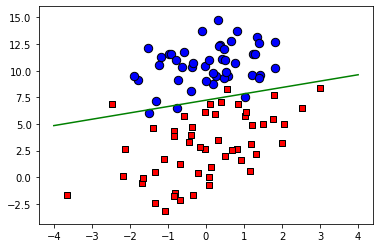

In [13]:
## plotting the decision boundary
for x1, x2, target in zip(X[:,0], X[:,1], np.array(y)):
    if target == 0:
        plt.scatter(x1, x2, s = 70, color = "blue", edgecolors="k")
    else:
        plt.scatter(x1, x2, color = "red", edgecolors="k", marker='s')

        
a = np.ones((X.shape[0],1)) ## for giving intercept
XX = np.hstack((a,X))

print("weights after %d iterations: "%(iteration), weights)
x = np.linspace(-4, 4, 100)
yy = -(weights[0]+weights[1]* x)/weights[2] 
plt.plot(x, yy, color = "g");

In [15]:
# Modified stochastic gradient ascent
import random
def stocGradAscent1(X, classLabels, numIter=150):
    m, n = X.shape
    weights = np.ones(n)
    for j in range(numIter): 
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01                    # alpha changes on each iteration
            randIndex = random.choice(dataIndex)        # randomly select one row
            h = sigmoid(sum(X[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * X[randIndex]
            dataIndex.remove(randIndex)                 # remove the selected row   
    return weights

weights :  [14.93396003  1.31583977 -2.01498324]


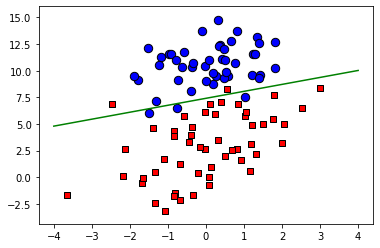

In [16]:
## plotting the decision boundary
for x1, x2, target in zip(X[:,0], X[:,1], np.array(y)):
    if target == 0:
        plt.scatter(x1, x2, s = 70, color = "blue", edgecolors="k")
    else:
        plt.scatter(x1, x2, color = "red", edgecolors="k", marker='s')

        
a = np.ones((X.shape[0],1)) ## for giving intercept
XX = np.hstack((a,X))
weights = stocGradAscent1(XX, y, 500)
print("weights : ", weights)
x = np.linspace(-4, 4, 100)
yy = -(weights[0]+weights[1]* x)/weights[2] 
plt.plot(x, yy, color = "g");

In [6]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
## Implementing Newton’s Method

In [371]:
def addIntercept(x):
    intercept = np.ones((X.shape[0],1))
    concat = np.hstack((intercept , X))  
    return concat

def sigmoid(x, Beta):
    X = addIntercept(x) 
    Beta = np.mat(Beta).T
    z = X * Beta 
    return 1.0 / (1.0 + np.exp(-z)) 

In [348]:
def log_likelihood(x, y, Beta):
    y = np.ravel(y)
    sigmoid_probs = np.ravel(sigmoid(x, Beta))                                       
    return np.sum(y* np.log(sigmoid_probs) + (1 - y) * np.log(1 - sigmoid_probs))   

def gradient(x, y, Beta): 
    y = np.ravel(y)
    sigmoid_probs = np.ravel(sigmoid(x, Beta))
    error = np.mat(y - sigmoid_probs)
    return np.array([[np.sum( error* x), np.sum(error * 1)]])   

In [373]:
sigmoid(X, Beta)
log_likelihood(X, y, Beta)
gradient(X, y, Beta)

array([[-48.90130574,  -4.89013057]])

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [140]:
f(X, y, beta)

273.52829896297334

In [144]:
sigmoid(np.array([1,4,5]))

array([0.73105858, 0.98201379, 0.99330715])

In [100]:
def f(X, y, beta):
    Xmat = np.mat(X)
    ymat = np.mat(y)
    Beta = np.mat(beta).T
    fBeta = np.ones(len(y))*np.log(1 + np.exp(Xmat * Beta)) - ymat*Xmat*Beta
    return np.ravel(fBeta)[0]  

In [149]:
def f(X, y, beta):
    Xmat = np.mat(X)
    ymat = np.mat(y)
    Beta = np.mat(beta).T
    fBeta = np.ones(len(y))*np.log(1 + np.exp(Xmat * Beta)) - ymat*Xmat*Beta
    return np.ravel(fBeta)[0]  

In [267]:
def nabla_f(X, y, beta):
    Xmat = np.mat(X)
    ymat = np.mat(y)
    Beta = np.mat(beta).T
    return Xmat.T * (sigmoid(Xmat*Beta) - ymat.T) 

In [268]:
nabla_f(X, y, beta)

matrix([[ 18.55328929],
        [479.75221986]])

In [ ]:
def nabla2_f(beta):
    return X.T*(np.diag(np.ravel(np.exp(X*beta)/np.power(1+np.exp(X*beta),2)))*X)

In [241]:
def nabla2_f(X, y, beta):
    X = np.mat(X)
    y = np.mat(y)
    beta = np.mat(beta).T
    return X.T*(np.diag(np.ravel(np.exp(X*beta)/np.power(1+np.exp(X*beta),2)))*X)   

In [408]:
import numpy as np
import random


class LogisticRegression(object):
    
    def __init__(self, alpha=0.01, numIter=10000, treshold=0.5, fitIntercept=True, verbose=False):
        self.alpha = alpha
        self.numIter = numIter
        self.treshold = treshold
        self.fitIntercept = fitIntercept
        self.verbose = verbose
        self.weights = None
        self.X_ = None
        self.y_ = None        
        self.predicted_ = None        
    
    def _addIntercept(self, X):
        intercept = np.ones((X.shape[0],1))   ## for giving intercept
        concat = np.hstack((intercept , X))   ## equal to np.concatenate((intercept, X), axis=1)
        return concat
    
    def _sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def _loss(self, y, h):
        """log loss function where h is the predicted value """
        if (h==0).any() or (h==1).any(): ## problem of log(0)
            h[h==0] = 1e-10
            h[h==1] = 1e-10        
        return (-y * np.log(h) - (1 - y) * np.log(1 - h))/len(h)
    
    def logLikelihood(self):
        """maximum log likelihood estimation"""
        y = np.mat(self.y_)
        X = np.mat(self.X_)
        Beta = self.weights        
        ll = -1*(np.ones(len(self.y_))*np.log(1 + np.exp(X * Beta)) - y*X*Beta)
        return np.ravel(ll)[0]  
    
    def _newtonsMethod(self,X, y):
        """newton's method optimization function"""
        Xmat = np.mat(X, dtype=np.float64)
        ymat = np.mat(y, dtype=np.float64)
        m, n = Xmat.shape
        weights = np.mat(np.zeros((n , 1)), dtype=np.float64) 
        ### gradient matrix
        def _nablaF(beta):
            return Xmat.T * (self._sigmoid(Xmat*beta) - ymat.T)
        ###  hessian matrix 
        def _nabla2F(beta):
            ## print(np.isfinite(mat).all())  problem of infinity
            with np.errstate(divide="ignore"):
                mat = np.power(1+np.exp(Xmat*beta),2)            
            if (mat == np.inf).any():
                mat[mat==np.inf] = 1e20
            return Xmat.T*(np.diag(np.ravel(np.exp(Xmat*beta)/mat))*Xmat) 
                    
        for i in range(self.numIter):
            weights = weights - np.linalg.inv(_nabla2F(weights))* _nablaF(weights)
            h = self._sigmoid(Xmat * weights)
            if (self.verbose and i% 1000 == 0):
                print('loss: %.4f'% (self._loss(ymat, h)))
        return weights        
    
    def _gradAscent(self, X, y):     
        """gradient ascent optimization functions"""
        Xmat = np.mat(X)
        ymat = np.mat(y).T
        m, n = Xmat.shape
        weights = np.ones((n , 1))
        for i in range(self.numIter):
            h = self._sigmoid(Xmat * weights) ## equal to np.dot(dataMatrix,weights)
            error = (ymat - h)
            weights = weights + self.alpha * Xmat.T * error
            if (self.verbose and i% 1000 == 0) :                
                print('loss: %.4f'% (self._loss(ymat.T,h)))
        return weights
       
    def _stocGradAscent(self, X, y):
        """stochastic gradient ascent"""
        m, n = X.shape
        weights = np.ones(n)
        for j in range(self.numIter):
            H = np.zeros((m,1))
            for i in range(m):
                h = self._sigmoid(sum(X[i]*weights))
                H[i,0] = h
                error = y[i] - h
                weights = weights + self.alpha * error * X[i]
            if (self.verbose and j% 1000 == 0) :                
                print('loss: %.4f'% (self._loss(np.mat(y), H)))
        return np.mat(weights).T
    
    def _modStocGradAscent(self, X, y):
        """modified stochastic gradient ascent"""
        m, n = X.shape
        weights = np.ones(n)
        for j in range(self.numIter): 
            dataIndex = list(range(m))
            for i in range(m):
                modAlpha = 4/(1.0+j+i) + self.alpha              # alpha changes on each iteration
                randIndex = random.choice(dataIndex)        # randomly select one row
                h = self._sigmoid(sum(X[randIndex]*weights))
                error = y[randIndex] - h
                weights = weights + modAlpha * error * X[randIndex]
                dataIndex.remove(randIndex)                 # remove the selected row   
        return np.mat(weights).T
    
    def fit(self, X, y, optimizer = "modified"):        
        if self.fitIntercept:
            X = self._addIntercept(X)    
        self.X_ = X
        self.y_ = y
        optimizers = ["modified", "stochastic", "normal", "newton"]
        functions = [self._modStocGradAscent, self._stocGradAscent, self._gradAscent, self._newtonsMethod]
        if optimizer in optimizers:
            self.weights = functions[optimizers.index(optimizer)](self.X_, self.y_) 
            return("LogisticRegression(optimizer=%s, alpha=%.4f, numIter=%d, treshold=%.2f, fitIntercept=%r)"%(optimizer,self.alpha,self.numIter,self.treshold,self.fitIntercept))
        else:
            raise Exception("Unknown gradient ascent optimization function. Valid names are: modified, stochastic, normal and newton.")
    
    def _probToClass(self, x):
        if (x > self.treshold):  return 1
        else: return 0
        
    def score(self, X = None): 
        """provides the accuracy of trained model"""
        if X is not None:
            X = self._addIntercept(X)          
            self.X_ = X            
        probMat = self._sigmoid(self.X_ * self.weights)        
        classMat = np.vectorize(self._probToClass)(probMat) ## apply a function to each element in a 2d numpy array/matrix
        prediction = np.ravel(classMat)
        self.predicted_ = prediction
        accuracy = [pred==true for pred,true in zip(prediction, self.y_)].count(True)/len(self.y_)
        return accuracy
    
    def predict_prob(self, X):
        return np.ravel(self._sigmoid(self._addIntercept(X) * self.weights)) # returns contiguous flattened 1D array
    
    def prediction(self, X):
        self.score(X)
        return self.predicted_

In [414]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
model = LogisticRegression(verbose=True)
model.fit(X_train, y_train, optimizer = "newton")
model.score()

[pred==true for pred,true in zip(model.prediction(X_test), y_test)].count(True)/len(y_test)

loss: 0.2941
loss: 0.1361
loss: 0.1361
loss: 0.1361
loss: 0.1361
loss: 0.1361
loss: 0.1361
loss: 0.1361
loss: 0.1361
loss: 0.1361


1.0